In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler



In [42]:
datos_originales_conjunto_1 = pd.read_csv('X_modificado.csv')
pd.read_csv('y_modificado.csv')
pd.read_csv('Z_modificado.csv')

,Unnamed: 0,Date,Price
0,0,2010-01-01,2225.25
1,1,2010-01-04,2225.25
2,2,2010-01-05,2246.50
3,3,2010-01-06,2302.50
4,4,2010-01-07,2306.50
...,...,...,...
3560,3560,2023-08-25,2123.50
3561,3561,2023-08-28,2116.25
3562,3562,2023-08-29,2116.25
3563,3563,2023-08-30,2140.25


In [43]:
df = datos_originales_conjunto_1
# Convertir la columna 'fecha' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna 'fecha' como índice
df.set_index('Date', inplace=True)

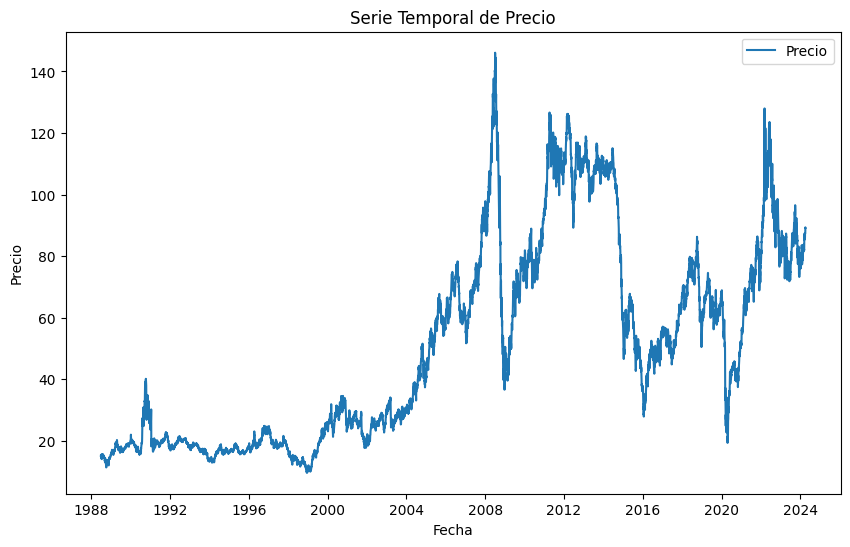

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], label='Precio')
plt.title('Serie Temporal de Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 3.7581888749863026


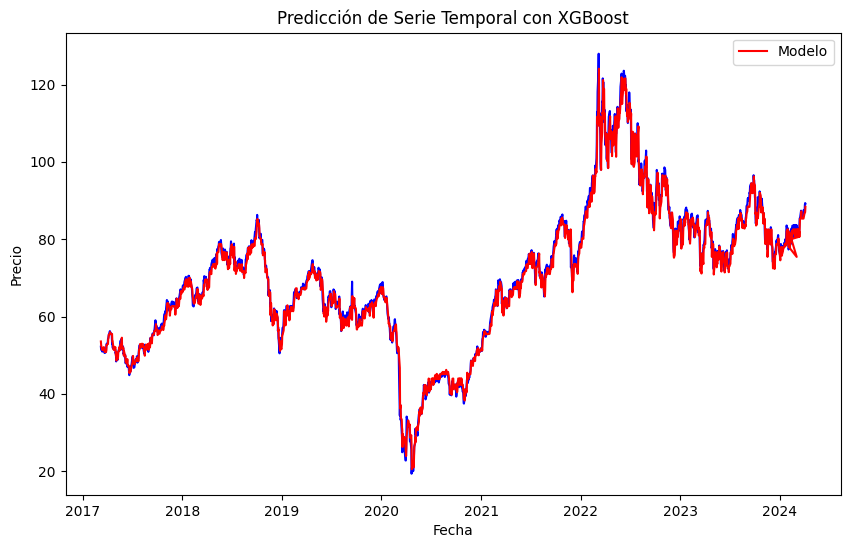

In [45]:
# Crear características de serie temporal (lag features)
def create_lag_features(df, lags=5):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Price'].shift(lag)
    df = df.dropna()  # Eliminar filas con valores nulos
    return df

# Crear características de lag
df = create_lag_features(df, lags=5)

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Separar las características (X) y el target (y)
X_train = train.drop(columns=['Price'])
y_train = train['Price']
X_test = test.drop(columns=['Price'])
y_test = test['Price']

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Hacer predicciones
predictions = model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio (MSE): {mse}")

# Graficar las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='', color='blue')
plt.plot(test.index, predictions, label='Modelo', color='red')
plt.title('Predicción de Serie Temporal con XGBoost')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()



C:\Users\quint.LAPTOP-LGVR2QRN\AppData\Local\Temp\ipykernel_5952\1003276900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{lag}'] = df['Price'].shift(lag)
C:\Users\quint.LAPTOP-LGVR2QRN\AppData\Local\Temp\ipykernel_5952\289512737.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['Prediction'] = model.predict(X_future_scaled)
C:\Users\quint.LAPTOP-LGVR2QRN\AppData\Local\Temp\ipykernel_5952\289512737.py:18: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  futu

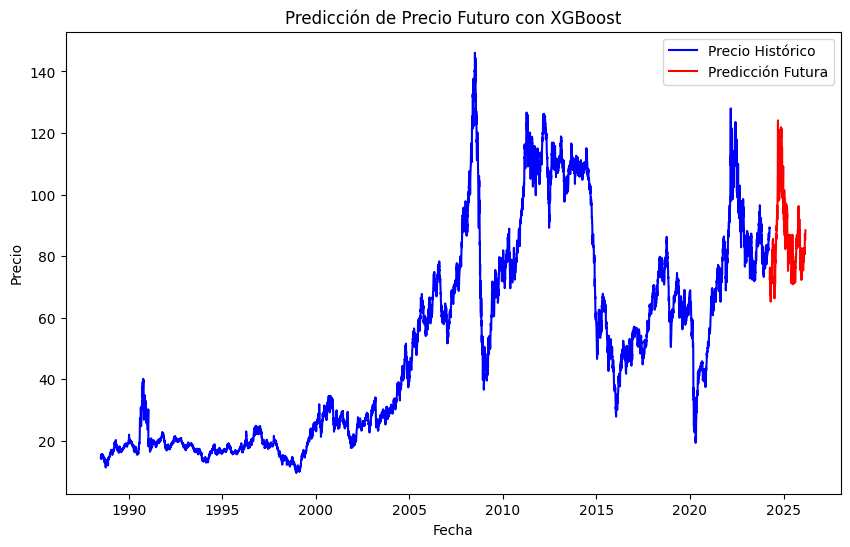

In [ ]:
# 

# Realizar predicciones futuras para 700 días y graficar el nuevo dataset
future_days = 700

# Crear un nuevo dataframe con las características de lag
future = create_lag_features(df, lags=5)

# Estandarizar las características
X_future = future.drop(columns=['Price'])
X_future_scaled = scaler.transform(X_future)

# Realizar predicciones futuras
future['Prediction'] = model.predict(X_future_scaled)

# Crear un rango de fechas futuras
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_days + 1, closed='right')

# Asignar las fechas al dataframe de predicciones futuras
future = future.tail(future_days)
future['Date'] = future_dates
future.set_index('Date', inplace=True)

# Mostrar las predicciones futuras
future.head()


# Graficar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Materia prima Y ', color='blue')
plt.plot(future.index, future['Prediction'], label='Predicción Futura', color='red')
plt.title('Predicción de Precio Futuro con XGBoost')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()



## Valor predicciones

In [47]:
# IMPRIMIR ULTIMO VALOR DE LA PREDICCION
print(future.tail(1))

            Unnamed: 0  Price  lag_1  lag_2  lag_3  lag_4  lag_5  Prediction
Date                                                                        
2026-03-05        9143  89.18  89.35  88.92  87.42  87.48  86.09   88.408371


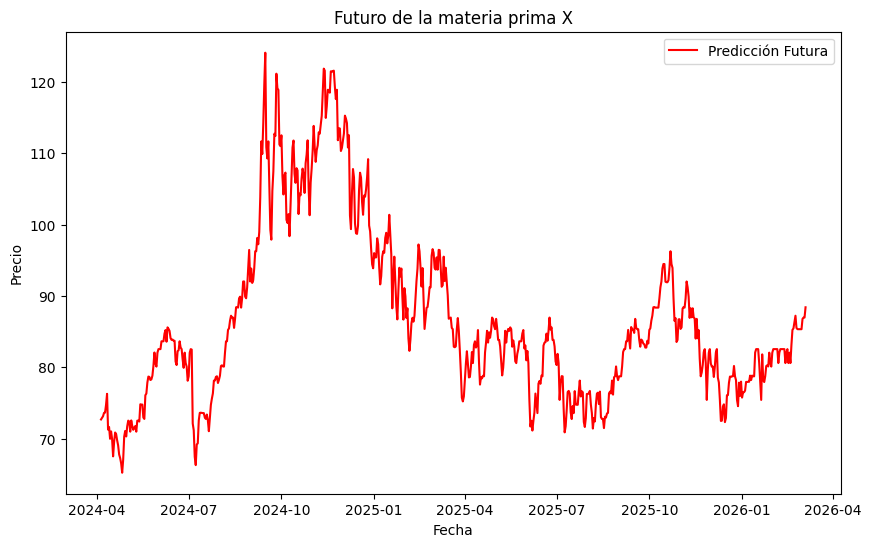

In [48]:
# graficar SOLAMENTE las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(future.index, future['Prediction'], label='Predicción Futura', color='red')
plt.title('Futuro de la materia prima X')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

---

---